<a href="https://colab.research.google.com/github/euguroglu/Machine-Learning-Projects/blob/master/Pytorch_Neural_network_simple_linear_regression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn

Defining random X values

In [3]:
X = torch.linspace(1,50,50).reshape(-1,1)

Defining Noise 'e'

In [4]:
torch.manual_seed(71)
e = torch.randint(-8,9,(50,1),dtype=torch.float)

In [ ]:
e

Defining linear equation to create linear like scatter to fit our model later

In [6]:
y = 2*X + 1  + e

In [7]:
y.shape

torch.Size([50, 1])

Being able plot tensor values we need to conver them to numpy array

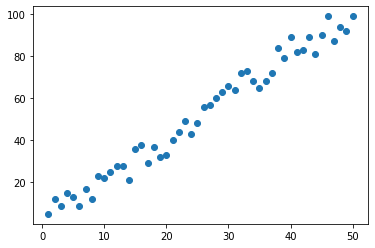

In [8]:
plt.scatter(X.numpy(),y.numpy())

In [9]:
torch.manual_seed(59)

model = nn.Linear(in_features=1,out_features=1)

print(model.weight)
print(model.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


## Creating Simple Neural Network

In [10]:
class Model(nn.Module):
  def __init__(self,in_features,out_features):

    super().__init__()
    self.linear = nn.Linear(in_features,out_features)
  def forward(self,x):
    y_pred = self.linear(x)
    return y_pred

In [11]:
torch.manual_seed(59)

model = Model(1,1)

print(model.linear.weight)
print(model.linear.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


## How to name model parameter

In [12]:
for name,param in model.named_parameters(): #model.named.parameters() comes from nn.module which we've inherited to our model
  print(name, '\t', param.item())

linear.weight 	 0.10597813129425049
linear.bias 	 0.9637961387634277


## Randomly checking model performance with initial parameters

Expected performance is poor one since model did not learn anything yet.

In [13]:
x = torch.tensor([2.]) 
print(model.forward(x))

tensor([1.1758], grad_fn=<AddBackward0>)


In [14]:
x1 = np.linspace(0.0,50.0,50)

In [15]:
w1 = 0.1059
b1 = 0.9637

y1 = w1*x1 + b1

In [16]:
y1

array([0.9637    , 1.07176122, 1.17982245, 1.28788367, 1.3959449 ,
       1.50400612, 1.61206735, 1.72012857, 1.8281898 , 1.93625102,
       2.04431224, 2.15237347, 2.26043469, 2.36849592, 2.47655714,
       2.58461837, 2.69267959, 2.80074082, 2.90880204, 3.01686327,
       3.12492449, 3.23298571, 3.34104694, 3.44910816, 3.55716939,
       3.66523061, 3.77329184, 3.88135306, 3.98941429, 4.09747551,
       4.20553673, 4.31359796, 4.42165918, 4.52972041, 4.63778163,
       4.74584286, 4.85390408, 4.96196531, 5.07002653, 5.17808776,
       5.28614898, 5.3942102 , 5.50227143, 5.61033265, 5.71839388,
       5.8264551 , 5.93451633, 6.04257755, 6.15063878, 6.2587    ])

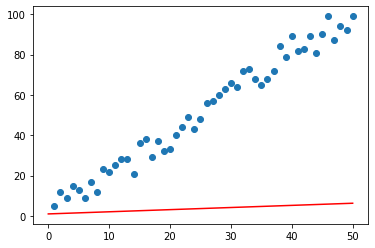

In [17]:
plt.scatter(X.numpy(),y.numpy())
plt.plot(x1,y1,'r')

Defining criterion of the cost calculation

In [18]:
criterion = nn.MSELoss()

Defining optimization method

In [19]:
optimizer = torch.optim.SGD(model.parameters(),lr = 0.001)

## Training

In [20]:
epochs = 50
losses = []

for i in range(epochs):

  i = i + 1

  y_pred = model.forward(X) # Predicting on the forward pass

  loss = criterion(y_pred,y) #Calculating our loss

  losses.append(loss) # Recording the error

  print('epoch {} loss: {} weight: {} bias: {}'.format(i,loss.item(),model.linear.weight.item(),model.linear.bias.item()))

  optimizer.zero_grad() #reseting the gradient

  loss.backward()
  optimizer.step()

epoch 1 loss: 3057.216796875 weight: 0.10597813129425049 bias: 0.9637961387634277
epoch 2 loss: 1588.53076171875 weight: 3.334900140762329 bias: 1.0604636669158936
epoch 3 loss: 830.2999267578125 weight: 1.014832854270935 bias: 0.9922628402709961
epoch 4 loss: 438.8521423339844 weight: 2.6817994117736816 bias: 1.0425218343734741
epoch 5 loss: 236.76144409179688 weight: 1.4840213060379028 bias: 1.0076650381088257
epoch 6 loss: 132.4291229248047 weight: 2.3446059226989746 bias: 1.0339646339416504
epoch 7 loss: 78.56573486328125 weight: 1.7262253761291504 bias: 1.0163217782974243
epoch 8 loss: 50.75775909423828 weight: 2.170504093170166 bias: 1.0302516222000122
epoch 9 loss: 36.4012336730957 weight: 1.8512457609176636 bias: 1.0214954614639282
epoch 10 loss: 28.98923110961914 weight: 2.0806007385253906 bias: 1.029038906097412
epoch 11 loss: 25.16238784790039 weight: 1.9157683849334717 bias: 1.0248701572418213
epoch 12 loss: 23.186473846435547 weight: 2.034165620803833 bias: 1.0291162729263

## Result

Text(0.5, 0, 'Epoch')

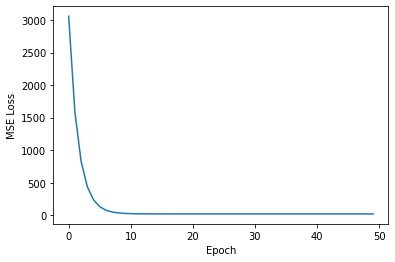

In [21]:
plt.plot(range(epochs),losses)
plt.ylabel('MSE Loss')
plt.xlabel('Epoch')

## Prediction and curve fitting

In [22]:
x = np.linspace(0.0,50.0,50)
current_weight = model.linear.weight.item()
current_bias = model.linear.weight.item()
predicted_y = current_weight*x + current_bias

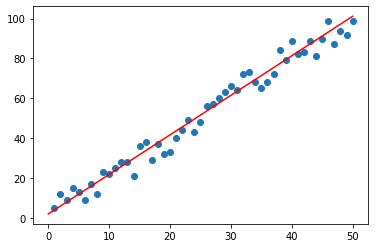

In [23]:
plt.scatter(X.numpy(),y.numpy())
plt.plot(x,predicted_y,'r')